# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from math import *
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from math import *
from statistics import *
from mpl_toolkits import mplot3d
from IPython.display import display, HTML
from matplotlib import animation
from matplotlib.gridspec import GridSpec
from tqdm import tqdm_notebook

# Réseaux de neurones supervisés 

   ## Création des données et de la relation F=aC + b + bruit

In [2]:
num_samples = 100
X = np.ones((num_samples,2))  #creer une matrice de de 100*2 rempli de 1
X[:,0] = 20*np.random.uniform(-1.,1.,num_samples)+10 # rempli la premiere colonne de valeurs entre -10 et +30 reparti uniformément
K = 20*np.random.uniform(-1.,1.,num_samples)+10
a = np.array([1.8,32])
y = X.dot(a) + np.random.normal(size=num_samples)  # on retrouve la relation y=1.8x(:,0) + 32*x(:,1) + bruit gaussien

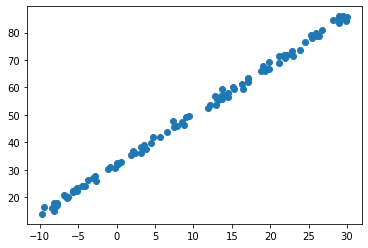

In [3]:
plt.scatter(X[:,0], y)   # plot la relation y=ax(:,0) +b

## Prétraitements

In [4]:
# Centrer réduit :
XprimCR = np.ones((num_samples,2))
XprimCR[:,0] = (X[:,0] - mean(X[:,0]))/pstdev(X[:,0]) #pstdev=ecart_type en englais
yprimCR = (y - mean(y))/pstdev(y)

#Interpolation linéaire
XprimIL = np.array([(max(X[:,0])-min(X[:,0]))*(x-min(X[:,0]))/(max(X[:,0])-min(X[:,0]))+min(X[:,0]) for x in X[:,0]])
yprimIL = np.array([(max(y)-min(y))*(Y-min(y))/(max(y)-min(y))+min(y) for Y in y])
#A voir si y doit aussi être prétraité. si oui il faut aussi mettre les fichier yprim dans le splitting

### Choix des données à utiliser :

In [5]:
#y=yprimCR
#X[:,0]=XprimCR[:,0]

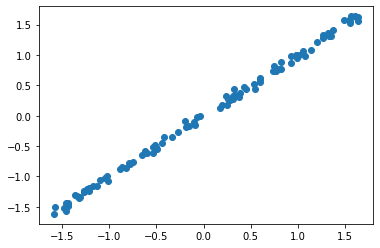

In [6]:
plt.scatter(XprimCR[:,0], yprimCR)  #on verifie que les donnees sont maintenant centrer reduit.

# Définition des datasets d'entrainement et de tests (20% des datas)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X[:,0],y,test_size=0.2)
#X_train, X_test, y_train, y_test = train_test_split(XprimCR,yprimCR,test_size=0.2)
X_train,X_test

(array([ 2.17401642, 13.72369904,  7.49815902, -2.66003863,  1.8268795 ,
        -5.17429951, -1.11142591, 21.80579477, -4.11062753,  9.35582112,
        -2.75881978, 11.90645155,  3.58730469, -8.10153468, 17.10952008,
        -6.31125457, 29.51581275, -8.15494682, -3.67244158,  5.70392767,
        -4.53824391, 28.68122586, 23.82027263, -3.03579293, 28.90475871,
        22.1659316 , 21.12396693, 12.14882928,  3.53128521,  3.23176603,
        17.13522258, -7.82223707,  8.50705512, 28.97525376, 26.71596541,
         3.75425898, 13.66841533, -5.32606474, 16.32263887, 22.96008688,
        26.0969257 , 19.85406084, 14.52254123, 26.35641604, -5.13260027,
        25.37223222, 19.89871847,  2.44098717, 18.82183118, -9.51017005,
        16.47941221, 29.62104228,  7.84033817, -7.90164616, 15.27624135,
        28.92897584, 24.55660348,  7.34555071, 25.99358978, 19.26910818,
        -0.88358025, -5.35722704, -6.69187652, -7.83030081,  8.99520674,
        13.85336963, 29.86089858, 19.03274382, 12.7

# Fonction de cout : mse

In [8]:
# évolution de la fonction de perte
def get_loss(a0,a1):
    theta = np.array([a0,a1]) # O1 et O2
    Y_hat = X.dot(theta)  #y^= a0x +a1
    return mse(y,Y_hat)   # erreur des moindres carrées
get_loss = np.vectorize(get_loss) # vectorise un tableau

In [9]:
# Erreur des moindres carrés
def mse(Y,Y_hat):
    return np.mean(np.square(Y_hat - Y),axis=0)

In [10]:
a0_range = np.linspace(-10,35,50)
a1_range = np.linspace(-10,35,50)
xx,yy = np.meshgrid(a0_range,a1_range)
loss_mesh = get_loss(xx,yy)

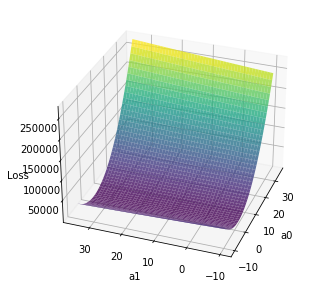

In [11]:
fig = plt.figure(figsize=(5,5))
ax = plt.axes(projection='3d')
ax.plot_surface(xx, yy, loss_mesh, cmap='viridis', alpha=0.8)
ax.set_xlabel('a0'); ax.set_ylabel('a1'); ax.set_zlabel('Loss')
ax.view_init(30, 200)

In [12]:
plt.rc('animation', html='html5')
fig = plt.figure(figsize=(14, 8))
gs = GridSpec(2, 2, width_ratios=[1, 2.5])

# plot ground truth & model
ax0 = fig.add_subplot(gs[0,0])
ax0.scatter(X[:,0], y, c='orange', label='Ground truth')
ax0.set_title('Ground truth & Model', fontsize=16)
line0, = ax0.plot([], [], label='Model')
ax0.legend(loc='lower right')

# plot loss 
ax1 = fig.add_subplot(gs[:,1], projection='3d')
ax1.set_title('Loss', fontsize=16, pad=20)
ax1.plot_surface(xx, yy, loss_mesh, cmap='viridis', alpha=0.8)
ax1.plot3D([a[0]], [a[1]], [0], c='r', marker='x', markersize=10, 
           label='Global minimum', linewidth=0)
line1, = ax1.plot3D([], [], [], c='r', marker='o', alpha=1, label='loss')
ax1.set_xlabel('a0'); ax1.set_ylabel('a1'); ax1.set_zlabel('Loss')
ax1.view_init(30, 200)
ax1.legend()

# plot weights & loss
ax2 = fig.add_subplot(gs[1,0])
ax2.set_title('Weights & Loss', fontsize=16)
line2, = ax2.plot([],[], label='a0')
line3, = ax2.plot([],[], label='a1')
ax2.set_ylim(0, 35)
ax2.set_xlim(0, 200)
ax2.set_xlabel('iterations')
ax2.set_ylabel('weights')
ax3 = ax2.twinx()
line4, = ax3.plot([],[], label='loss', c='r')
ax3.set_ylabel('loss')
ax3.set_ybound(0, 300)

ax2.legend((line2, line3, line4), ('a0', 'a1', 'loss'), loc='center right')


fig.tight_layout()
fig.subplots_adjust(top=0.85)
plt.close()

def animate(i,s):
    line0.set_data(X[:,0], (X.dot(rec_wgts[i])))
    line1.set_data(rec_wgts[:i+1,0], rec_wgts[:i+1,1])
    line1.set_3d_properties(rec_loss[:i+1])
    epochs = np.arange(i+1)
    if s == 'Batch Gradient Descent' : epochno = i
    elif s == 'Stochastic Gradient Descent' : epochno = int(i/num_samples) + 1
    else : epochno = int(i/10) + 1
    ttl = fig.suptitle(f'{s}\n epoch number: = {epochno}', fontsize=20)
    line2.set_data(epochs, rec_wgts[:i+1, 0])
    line3.set_data(epochs, rec_wgts[:i+1, 1])
    line4.set_data(epochs, rec_loss[:i+1])
    return line0, line1, line2, line3, line4, ttl

## Training Loop

In [13]:
a0 = 28.  # poids
a1 = 34.  # poids

In [14]:
def train(gd_func,a0,a1):
    recorder = []
    theta = np.array([a0,a1])
    for epoch in np.arange(epochs):
        val = gd_func(theta,alpha)
        if type(val) is tuple:
            recorder.append(val)
        else :
            recorder.extend(val)
    rec_wgts, rec_loss = [list(o) for o in zip(*recorder)]
    rec_wgts = np.stack(rec_wgts)
    return rec_wgts, rec_loss

## Batch Gradient Descent ( works ) 

In [15]:
def gd(theta,alpha):
    Y_hat = X.dot(theta)
    loss = mse(Y_hat,y)
    prevtheta = theta.copy()
    thetagrad = np.mean(X*((Y_hat - y).reshape(-1,1)),axis=0)
    print(theta)
    theta -= thetagrad*alpha
    return prevtheta,loss

In [16]:
alpha = 0.005 #batch gradient descent, sgd, sgdm
epochs = 200
rec_wgts,rec_loss = train(gd,a0,a1)
s = "Batch Gradient Descent"
animation.FuncAnimation(fig, animate,frames=tqdm_notebook(range(len(rec_loss))), interval=30,fargs=[s])


[28. 34.]
[-4.35211135 32.70674316]
[ 3.19448358 33.00505348]
[ 1.4342965  32.93212469]
[ 1.84501117 32.94580141]
[ 1.74934039 32.93928667]
[ 1.77178879 32.93749191]
[ 1.76668428 32.93460626]
[ 1.76800636 32.93198514]
[ 1.76782898 32.92931235]
[ 1.76800096 32.92666161]
[ 1.76809106 32.9240157 ]
[ 1.76819985 32.92137861]
[ 1.76830389 32.91874937]
[ 1.76840865 32.91612818]
[ 1.76851284 32.91351496]
[ 1.76861678 32.9109097 ]
[ 1.76872038 32.90831238]
[ 1.76882367 32.90572297]
[ 1.76892665 32.90314144]
[ 1.76902932 32.90056778]
[ 1.76913167 32.89800195]
[ 1.7692337  32.89544394]
[ 1.76933543 32.89289372]
[ 1.76943685 32.89035127]
[ 1.76953796 32.88781656]
[ 1.76963876 32.88528957]
[ 1.76973926 32.88277028]
[ 1.76983945 32.88025865]
[ 1.76993933 32.87775468]
[ 1.77003891 32.87525834]
[ 1.77013818 32.87276959]
[ 1.77023716 32.87028843]
[ 1.77033583 32.86781482]
[ 1.7704342  32.86534875]
[ 1.77053227 32.86289019]
[ 1.77063005 32.86043911]
[ 1.77072752 32.8579955 ]
[ 1.7708247  32.85555933]
[ 

C:\Users\axelc\AppData\Local\Temp/ipykernel_8612/472638189.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  animation.FuncAnimation(fig, animate,frames=tqdm_notebook(range(len(rec_loss))), interval=30,fargs=[s])


  0%|          | 0/200 [00:00<?, ?it/s]

## Stochastic Gradient Descent (Works)

In [17]:
def sgd(theta,alpha):
    rl = []
    shuffled_i = np.random.permutation(np.arange(X.shape[0]))
    X_shuff = X[shuffled_i]
    Y_shuff = y[shuffled_i]
    for i in np.arange(X.shape[0]):
        Yi_hat = X_shuff[i].dot(theta)
        loss=(Yi_hat - Y_shuff[i])**2
        prevtheta = theta.copy()
        thetagrad = X_shuff[i]*(Yi_hat - Y_shuff[i])
        theta -= thetagrad*alpha
        print(theta)
        rl.append((prevtheta,loss))
    return rl

In [18]:
alpha = 0.005 #batch gradient descent, sgd, sgdm
epochs = 2
rec_wgts,rec_loss = train(sgd,a0,a1)
s = "Stochastic Gradient Descent"
animation.FuncAnimation(fig, animate, tqdm_notebook(range(len(rec_loss))), interval=30,fargs = [s])

[27.01847307 34.35577783]
[15.64617008 35.55158221]
[-0.40443022 34.49079865]
[ 1.33489222 34.6245254 ]
[ 1.70922961 34.58594341]
[ 1.74357604 34.57659093]
[ 1.66495881 34.56610606]
[ 1.59000728 34.56042775]
[ 1.65122341 34.56876152]
[ 1.54437655 34.55650318]
[ 1.70477522 34.5690641 ]
[ 1.52240265 34.55645179]
[ 1.58302041 34.53366349]
[ 1.5475127  34.52376533]
[ 2.08476584 34.54494018]
[ 2.08404147 34.54504842]
[ 1.896171   34.52108639]
[ 1.37142443 34.48924383]
[ 2.49789254 34.53240861]
[-0.76346086 34.41967205]
[ 2.82979472 34.62908073]
[ 0.12344697 34.50097243]
[ 0.78388767 34.57156385]
[ 1.12801095 34.60982015]
[ 1.26352901 34.58362954]
[ 3.39322236 34.65712996]
[-0.12775009 34.48018528]
[-0.13016291 34.46902841]
[ 1.20861204 34.57273736]
[ 1.22021164 34.55960941]
[ 1.2574267  34.56752057]
[ 1.38897655 34.54282131]
[ 1.39235102 34.54333915]
[ 1.7825876  34.57177438]
[ 1.88878114 34.55533709]
[ 1.86441776 34.54200103]
[ 1.90836898 34.53433944]
[ 1.9490875  34.52673876]
[ 2.01363432

C:\Users\axelc\AppData\Local\Temp/ipykernel_8612/3809205005.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  animation.FuncAnimation(fig, animate, tqdm_notebook(range(len(rec_loss))), interval=30,fargs = [s])


  0%|          | 0/200 [00:00<?, ?it/s]

# Stochastic Gradient Descent With Momentum (Works)

In [19]:
def sgdm(theta,alpha):
    decay_factor=0.24
    momentum=0
    rl = []
    shuffled_i = np.random.permutation(np.arange(X.shape[0]))
    X_shuff = X[shuffled_i]
    Y_shuff = y[shuffled_i]
    for i in np.arange(X.shape[0]):
        Yi_hat = X_shuff[i].dot(theta)
        loss=(Yi_hat - Y_shuff[i])**2
        prevtheta = theta.copy()
        thetagrad = X_shuff[i]*(Yi_hat - Y_shuff[i])
        momentum=decay_factor*momentum + thetagrad*alpha
        theta -= momentum
        print(theta)
        rl.append((prevtheta,loss))
    return rl

In [20]:
alpha = 0.001 #batch gradient descent, sgd, sgdm
epochs = 2
rec_wgts,rec_loss = train(sgdm,a0,a1)
s = "Stochastic Gradient Descent With Momentum"
animation.FuncAnimation(fig, animate, tqdm_notebook(range(len(rec_loss))), interval=30,fargs = [s])

[22.94820162 33.63533793]
[18.59193063 33.28904189]
[ 3.46125482 32.71904286]
[-0.18318018 32.58698164]
[-0.96738065 32.54128438]
[ 0.14747323 32.58969076]
[ 1.83575345 32.65034031]
[ 2.23306134 32.66431582]
[ 2.15176718 32.65930749]
[ 2.02066824 32.65224253]
[ 1.95072807 32.6475887 ]
[ 1.93336532 32.64550244]
[ 1.92107316 32.64599808]
[ 1.86297282 32.64318691]
[ 1.84141944 32.6401577 ]
[ 1.78970583 32.63764731]
[ 1.75711921 32.63556876]
[ 1.75161082 32.63463826]
[ 1.74783703 32.63476994]
[ 1.794329   32.63645411]
[ 1.82132685 32.63809873]
[ 1.82784395 32.63848638]
[ 1.8228541  32.63683368]
[ 1.81453075 32.6355994 ]
[ 1.80756551 32.63454085]
[ 1.80603361 32.63412863]
[ 1.81758133 32.63252173]
[ 1.81858692 32.63261692]
[ 1.8188189  32.63246178]
[ 1.80788353 32.63178401]
[ 1.80682133 32.6312771 ]
[ 1.80879899 32.63139407]
[ 1.82019114 32.6302969 ]
[ 1.7940895  32.62873267]
[ 1.76798617 32.62769444]
[ 1.7956734  32.62915534]
[ 1.77104182 32.62793417]
[ 1.76306932 32.62679679]
[ 1.76099611

C:\Users\axelc\AppData\Local\Temp/ipykernel_8612/1941459717.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  animation.FuncAnimation(fig, animate, tqdm_notebook(range(len(rec_loss))), interval=30,fargs = [s])


  0%|          | 0/200 [00:00<?, ?it/s]

# AdaGrad ( Adaptive Gradient )

In [21]:
def adaGrad(theta,alpha):
    rl = []
    somme_grad=0
    epsilon = 10**(-8)
    shuffled_i = np.random.permutation(np.arange(X.shape[0]))
    X_shuff = X[shuffled_i]
    Y_shuff = y[shuffled_i]
    for i in np.arange(X.shape[0]):
        Yi_hat = X_shuff[i].dot(theta)
        loss = (Yi_hat - Y_shuff[i])**2
        prevtheta = theta.copy()
        thetagrad = np.mean(X_shuff[i]*((Yi_hat - Y_shuff[i]).reshape(-1,1)),axis=0)
        somme_grad += np.square(thetagrad)
        theta -= thetagrad*alpha/(np.sqrt(somme_grad + epsilon))
        rl.append((prevtheta,loss))
        print(theta)
    return rl

In [22]:
alpha = 4 # adagrad
epochs = 2
rec_wgts,rec_loss = train(adaGrad,a0,a1)
s = "Adaptative Gradient Descent"
animation.FuncAnimation(fig, animate, tqdm_notebook(range(len(rec_loss))), interval=30,fargs = [s])

[24. 30.]
[20.01766932 26.20832385]
[19.93457393 26.71843726]
[19.58006334 25.74970592]
[19.53723205 25.42499582]
[19.52975563 25.589668  ]
[18.30777615 23.92491752]
[15.78545456 21.72963592]
[14.6052049  20.40562464]
[14.21364418 19.70379367]
[12.49686725 18.2487185 ]
[11.93899318 17.50270817]
[11.85846716 17.24468745]
[11.16670808 16.45160028]
[11.11205808 16.70761849]
[10.7278805  16.15025802]
[10.72703556 16.14061076]
[10.69579735 16.00474333]
[10.48804346 15.6155976 ]
[10.48283747 15.57515177]
[10.43306951 15.81254524]
[10.33164341 16.13165669]
[10.31648228 16.04762992]
[10.31694838 16.10065596]
[ 9.79073522 15.48965316]
[ 9.71346684 15.76346957]
[ 9.69700676 15.90939846]
[ 9.50284383 15.56285561]
[ 8.61189191 14.80547323]
[ 8.35916262 14.44382828]
[ 8.0602216  14.05941176]
[ 7.53537776 13.55283028]
[ 7.34559807 13.27118917]
[ 7.25122533 13.0905829 ]
[ 7.21629813 13.25674562]
[ 6.965964   12.94407544]
[ 6.73709094 12.65465184]
[ 6.3522417  12.28413236]
[ 6.35440565 12.29906929]
[ 

C:\Users\axelc\AppData\Local\Temp/ipykernel_8612/793781951.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  animation.FuncAnimation(fig, animate, tqdm_notebook(range(len(rec_loss))), interval=30,fargs = [s])


  0%|          | 0/200 [00:00<?, ?it/s]

# RMSProp (Root Mean Square Propagation)

In [23]:
def rmsProp(theta,alpha):
    rl = []
    E=0
    somme_grad=0
    epsilon = 10**(-8)
    shuffled_i = np.random.permutation(np.arange(X.shape[0]))
    X_shuff = X[shuffled_i]
    Y_shuff = y[shuffled_i]
    for i in np.arange(X.shape[0]):
        Yi_hat = X_shuff[i].dot(theta)
        loss = (Yi_hat - Y_shuff[i])**2
        prevtheta = theta.copy()
        thetagrad = np.mean(X_shuff[i]*((Yi_hat - Y_shuff[i]).reshape(-1,1)),axis=0)
        E=0.9*E + 0.1*(thetagrad**2)
        theta -= thetagrad*alpha/(np.sqrt(E + epsilon))
        rl.append((prevtheta,loss))
        print(theta)
    return rl


In [24]:
alpha = 0.5 # rmsprop
epochs = 2
rec_wgts,rec_loss = train(rmsProp,a0,a1)
s = "Root Mean Square Propagation"
animation.FuncAnimation(fig, animate, tqdm_notebook(range(len(rec_loss))), interval=30,fargs = [s])

[26.41886117 35.58113883]
[24.83780704 34.00800296]
[24.83653019 34.05057784]
[24.79901907 33.80460876]
[23.63756947 32.65056548]
[23.63749635 32.6406503 ]
[23.37150268 32.10339866]
[23.27846259 32.41882592]
[22.61615684 31.62829917]
[21.90477926 30.86205283]
[21.54200908 30.33508597]
[21.45561513 30.59518803]
[21.09887156 30.07946559]
[21.05908203 30.25536472]
[20.43899762 29.59101351]
[20.33831046 29.32446006]
[20.08682538 28.90687773]
[20.06718692 28.78927528]
[19.44882633 28.13778086]
[19.05151112 27.63254214]
[18.57196096 27.09120863]
[18.52390576 27.27011407]
[17.52645721 26.47530726]
[17.41824095 26.73763629]
[17.36736904 26.92167337]
[17.02273464 26.46151024]
[16.80207504 26.09937663]
[15.88794067 25.35546604]
[15.52636932 24.90539699]
[15.14756244 24.45368382]
[15.14753374 24.45254222]
[15.11640336 24.59557676]
[14.95809859 24.29245974]
[14.955456   24.25881836]
[14.26451961 23.61444559]
[14.2441225  23.51227037]
[13.42904471 22.81603592]
[13.41261014 22.92626464]
[13.37871382

C:\Users\axelc\AppData\Local\Temp/ipykernel_8612/3242164539.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  animation.FuncAnimation(fig, animate, tqdm_notebook(range(len(rec_loss))), interval=30,fargs = [s])


  0%|          | 0/200 [00:00<?, ?it/s]

# ADAM (Adaptive Moment Estimation)

In [25]:
def adam(theta,alpha):
    rl = []
    m=0
    v=0
    b1=0.9  #decay factor
    b2=0.999
    somme_grad=0
    epsilon = 10**(-8)
    shuffled_i = np.random.permutation(np.arange(X.shape[0]))
    X_shuff = X[shuffled_i]
    Y_shuff = y[shuffled_i]
    for i in np.arange(X.shape[0]):
        Yi_hat = X_shuff[i].dot(theta)
        loss = (Yi_hat - Y_shuff[i])**2
        prevtheta = theta.copy()
        thetagrad = np.mean(X_shuff[i]*((Yi_hat - Y_shuff[i]).reshape(-1,1)),axis=0)
        m=b1*m +(1-b1)*thetagrad
        v=b2*v +(1-b2)*(thetagrad**2)
        m_hat=m/(1-b1)
        v_hat=v/(1-b2)
        theta -= m_hat*alpha/(np.sqrt(v_hat)+epsilon)
        rl.append((prevtheta,loss))
        print(theta)
    return rl


In [26]:
alpha = 0.38 # adam
epochs = 2
rec_wgts,rec_loss = train(adam,a0,a1)
s = "Adam"
animation.FuncAnimation(fig, animate, tqdm_notebook(range(len(rec_loss))), interval=30,fargs = [s])

[27.62 33.62]
[27.12314665 33.59011712]
[26.62896791 33.89094338]
[26.15360121 33.70022153]
[25.61766118 33.29868339]
[25.07717122 32.83464856]
[24.52800155 32.31851016]
[24.02053213 31.90821926]
[23.46517825 31.42161286]
[22.93686007 31.06008579]
[22.33578886 30.57768785]
[21.79455501 30.14364042]
[21.18025224 29.610935  ]
[20.60608667 29.08042882]
[20.08277372 28.63474268]
[19.60994951 28.21940915]
[19.18077255 27.82523613]
[18.78609059 27.50516735]
[18.36157269 27.1311386 ]
[17.88211906 26.69674575]
[17.32010429 26.19284076]
[16.76560307 25.67454062]
[16.23667637 25.15871132]
[15.65030461 24.60101493]
[15.09819385 24.05692377]
[14.57426104 23.52365167]
[14.10249005 23.04363905]
[13.63033569 22.55626282]
[13.20088594 22.13699129]
[12.81395461 21.75656218]
[12.4635344  21.40381259]
[12.14801898 21.08834874]
[11.82133023 20.75590231]
[11.47238583 20.40237562]
[11.15796918 20.08946285]
[10.87319278 19.79973707]
[10.56381687 19.48824424]
[10.24588388 19.16559214]
[ 9.94183399 18.84761662

C:\Users\axelc\AppData\Local\Temp/ipykernel_8612/948975572.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  animation.FuncAnimation(fig, animate, tqdm_notebook(range(len(rec_loss))), interval=30,fargs = [s])


  0%|          | 0/200 [00:00<?, ?it/s]